## <center>BCG Data Science and Analytics Virtual Experience Program</center>
### <center>Task 3: Feature Engineering & Modelling</center>
<center>Uncovering signals within the data, predicting churn probability and evaluating model performance.</center>

#### <center>Author: Akshay Pandurang Paunikar</center>

### Here is the background information on your task
The team now has a good understanding of the data and feels confident to use the data to further understand the business problem. The team now needs to brainstorm and build out features to uncover signals in the data that could inform the churn model.

Feature engineering is one of the keys to unlocking predictive insight through mathematical modeling. Based on the data that is available and was cleaned, identify what you think could be drivers of churn for our client and build those features to later use in your model.

First focus on building on top of the feature that your colleague has already investigated: “the difference between off-peak prices in December and January the preceding year”. After this, if you have time, feel free to get creative with making any other features that you feel are worthwhile.

Once you have a set of features, you must train a Random Forest classifier to predict customer churn and evaluate the performance of the model with suitable evaluation metrics. Be rigorous with your approach and give full justification for any decisions made by yourself as the intern data scientist. 

Recall that the hypotheses under consideration is that churn is driven by the customers’ price sensitivities and that it would be possible to predict customers likely to churn using a predictive model.

If you’re eager to go the extra mile for the client, when you have a trained predictive model, remember to investigate the client’s proposed discounting strategy, with the head of the SME division suggesting that offering customers at high propensity to churn a 20% discount might be effective.

Build your models and test them while keeping in mind you would need data to prove/disprove the hypotheses, as well as to test the effect of a 20% discount on customers at high propensity to churn.


### Here is your task
#### Sub-Task 1

Your colleague has done some work on engineering the features within the cleaned dataset and has calculated a feature which seems to have predictive power. 

This feature is “the difference between off-peak prices in December and January the preceding year”. 

Run the cells in the notebook provided (named feature_engineering.ipynb) to re-create this feature. then try to think of ways to improve the feature’s predictive power and elaborate why you made those choices. 

You should spend 1 - 1.5 hours on this. Be sure to make use of the “feature_engineering.ipynb” notebook to get started with re-creating your colleagues' features.

#### Sub-Task 2

Now that you have a dataset of cleaned and engineered features, it is time to build a predictive model to see how well these features are able to predict a customer churning. It is your task to train a Random Forest classifier and to evaluate the results in an appropriate manner. We would also like you to document the advantages and disadvantages of using a Random Forest for this use case. It is up to you how to fulfill this task, but you may want to use the below points to guide your work:

Ensure you’re able to explain the performance of your model, where did the model underperform?
Why did you choose the evaluation metrics that you used? Please elaborate on your choices.
Document the advantages and disadvantages of using the Random Forest for this use case.
Do you think that the model performance is satisfactory? Give justification for your answer.
(Bonus) - Relate the model performance to the client's financial performance with the introduction of the discount proposition. How much money could a client save with the use of the model? What assumptions did you make to come to this conclusion?
You should spend 1 - 1.5 hours on this. When it comes to model evaluation and the explanation of your results, feel free to use the additional links below.

#### If you are stuck:

Sub-Task 1

 - Think of ways to evaluate a feature against a label.
 - Think of ways to add new features which would complement the already existing ones. 
 - Think of feature granularity. 
 - Remove unnecessary features.
 
Sub-Task 2

- Is this problem best represented as classification or regression? 
- What kind of model performance do you think is appropriate? 
- Most importantly how would you measure such a performance? 
- How would you tie business metrics such as profits or savings to the model performance?

In [174]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [175]:
# Set the working directory
import io
%cd "E:\FORAGE\BCG\Task 3 - Feature Engineering & Modelling"

e:\FORAGE\BCG\Task 3 - Feature Engineering & Modelling


In [176]:
price_data = pd.read_csv("price_data.csv")
data = pd.read_csv("clean_data_after_eda.csv")

In [177]:
data['date_activ'] = pd.to_datetime(data['date_activ'], format='%Y-%m-%d')
data['date_end'] = pd.to_datetime(data['date_end'], format='%Y-%m-%d')
data['date_modif_prod'] = pd.to_datetime(data['date_modif_prod'], format='%Y-%m-%d')
data['date_renewal'] = pd.to_datetime(data['date_renewal'], format='%Y-%m-%d')

In [178]:
data = data.drop(['Unnamed: 0'], axis=1)
data

id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0             0         54946                0 2013-06-15 2016-06-15   
1          4660             0                0 2009-08-21 2016-08-30   
2           544             0                0 2010-04-16 2016-04-16   
3          1584             0                0 2010-03-30 2016-03-30   
4          4425             0              526 2010-01-13 2016-03-07   
...         ...           ...              ...        ...        ...   
14601     32270         47940                0 2012-05-24 2016-05-08   
14602      7223             0              181 2012-08-27 2016-08-27   
14603      1844             0              179 2012-02-08 2016-02-07   
14604       131             0                0 2012-08-30 2016-08-30   
14605      8730             0                0 2009-12-18 2016-12-17   

      date_modif_prod date_renewal  forecast_cons_12m  ...  \
0          2015-11-01   2015-06-23               0.00  ...   
1          2009-08-21   2015-08-31             189.95  ...   
2          2010-04-16   2015-04-17              47.96  ...   
3          2010-03-30   2015-03-31             240.04  ...   
4          2010-01-13   2015-03-09             445.75  ...   
...               ...          ...                ...  ...   
14601      2015-05-08   2014-05-26            4648.01  ...   
14602      2012-08-27   2015-08-28             631.69  ...   
14603      2012-02-08   2015-02-09             190.39  ...   
14604      2012-08-30   2015-08-31              19.34  ...   
14605      2009-12-18   2015-12-21             762.41  ...   

       var_6m_price_p1_var  var_6m_price_p2_var  var_6m_price_p3_var  \
0                 0.000131         4.100838e-05         9.084737e-04   
1                 0.000003         1.217891e-03         0.000000e+00   
2                 0.000004         9.450150e-08         0.000000e+00   
3                 0.000003         0.000000e+00         0.000000e+00   
4                 0.000011         2.896760e-06         4.860000e-10   
...                    ...                  ...                  ...   
14601             0.000003         0.000000e+00         0.000000e+00   
14602             0.000009         2.225451e-06         1.802667e-08   
14603             0.000011         2.896760e-06         4.860000e-10   
14604             0.000003         1.217891e-03         0.000000e+00   
14605             0.000004         9.450150e-08         0.000000e+00   

       var_6m_price_p1_fix  var_6m_price_p2_fix  var_6m_price_p3_fix  \
0                 2.086294            99.530517            44.235794   
1                 0.009482             0.000000             0.000000   
2                 0.000000             0.000000             0.000000   
3                 0.000000             0.000000             0.000000   
4                 0.000000             0.000000             0.000000   
...                    ...                  ...                  ...   
14601             0.000000             0.000000             0.000000   
14602             0.014939             0.005682             0

In [179]:
data.corr()

cons_12m  cons_gas_12m  cons_last_month  \
cons_12m                        1.000000      0.488474         0.968212   
cons_gas_12m                    0.488474      1.000000         0.507007   
cons_last_month                 0.968212      0.507007         1.000000   
forecast_cons_12m               0.193947      0.084359         0.177773   
forecast_cons_year              0.167093      0.080934         0.193574   
forecast_discount_energy       -0.043282     -0.012595        -0.040874   
forecast_meter_rent_12m         0.065268      0.041393         0.057476   
forecast_price_energy_off_peak -0.007748     -0.017684        -0.005187   
forecast_price_energy_peak      0.145908      0.074002         0.136802   
forecast_price_pow_off_peak    -0.026566     -0.020558        -0.023017   
imp_cons                        0.159711      0.077846         0.187034   
margin_gross_pow_ele           -0.011926      0.006868        -0.011498   
margin_net_pow_ele             -0.011905      0.006852        -0.011477   
nb_prod_act                     0.154251      0.239387         0.169099   
net_margin                      0.133614      0.070867         0.121835   
num_years_antig                -0.003565     -0.013815        -0.003677   
pow_max                         0.082889      0.054317         0.074529   
var_year_price_p1_var          -0.005251      0.001510        -0.004117   
var_year_price_p2_var          -0.012392      0.000147        -0.011036   
var_year_price_p3_var           0.060315      0.043898         0.053209   
var_year_price_p1_fix           0.030638      0.025228         0.031108   
var_year_price_p2_fix           0.062238      0.045399         0.054611   
var_year_price_p3_fix           0.064262      0.047781         0.056279   
var_year_price_p1               0.030637      0.025228         0.031108   
var_year_price_p2               0.062237      0.045398         0.054611   
var_year_price_p3               0.064262      0.047781         0.056279   
var_6m_price_p1_var             0.019428      0.018825         0.018144   
var_6m_price_p2_var            -0.001380      0.003117        -0.002579   
var_6m_price_p3_var             0.068189      0.039957         0.054798   
var_6m_price_p1_fix             0.030496      0.028802         0.028751   
var_6m_price_p2_fix             0.067322      0.040323         0.054060   
var_6m_price_p3_fix             0.069571      0.040105         0.056065   
var_6m_price_p1                 0.030496      0.028802         0.028751   
var_6m_price_p2                 0.067322      0.040323         0.054060   
var_6m_price_p3                 0.069571      0.040105         0.056065   
churn                          -0.045968     -0.037957        -0.045284   

                                forecast_cons_12m  forecast_cons_year  \
cons_12m                                 0.193947            0.167093   
cons_gas_12m                             0.084359            0.080934   
cons_last_month                          0.177773            0.193574   
forecast_cons_12m                        1.000000            0.647727   
forecast_cons_year                       0.647727            1.000000   
forecast_discount_energy                 0.058435            0.008518   
forecast_meter_rent_12m                  0.305627            0.276009   
forecast_price_energy_off_peak          -0.135646           -0.158012   
forecast_price_energy_peak               0.254056            0.251005   
forecast_price_pow_off_peak             -0.018477           -0.044190   
imp_cons                                 0.634600            0.969395   
margin_gross_pow_ele                    -0.023220           -0.010759   
margin_net_pow_ele                      -0.023231           -0.010727   
nb_prod_act                              0.055915            0.040426   
net_margin                               0.768537            0.464928   
num_years_antig                          0.021283            0.048248   
pow_max        

### Feature engineering:
#### Difference between off-peak prices in December and preceding January:

In [180]:
price_data['price_date'] = pd.to_datetime(price_data['price_date'], format='%Y-%m-%d')
price_data.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [181]:
 # Group off-peak prices by companies and month
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id

id price_date  price_off_peak_var  \
0       0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1       0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
...                                  ...        ...                 ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01            0.119916   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01            0.119916   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01            0.119916   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

        price_off_peak_fix  
0                40.565969  
1                40.565969  
2                40.728885  
3                40.728885  
4                40.728885  
...                    ...  
192997           40.728885  
192998           40.728885  
192999           40.728885  
193000           40.728885  
193001           40.728885  

[193002 rows x 4 columns]

In [182]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

In [183]:
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1','price_off_peak_fix': 'dec_2'}), 
                jan_prices.drop(columns='price_date'),on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id','offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [184]:
data =  pd.merge(data,diff, on='id')
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_p3_var  \
0      2015-11-01   2015-06-23               0.00  ...         9.084737e-04   
1      2009-08-21   2015-08-31             189.95  ...         0.000000e+00   
2      2010-04-16   2015-04-17              47.96  ...         0.000000e+00   
3      2010-03-30   2015-03-31             240.04  ...         0.000000e+00   
4      2010-01-13   2015-03-09             445.75  ...         4.860000e-10   

   var_6m_price_p1_fix  var_6m_price_p2_fix  var_6m_price_p3_fix  \
0             2.086294            99.530517            44.235794   
1             0.009482             0.000000             0.000000   
2             0.000000             0.000000             0.000000   
3             0.000000             0.000000             0.000000   
4             0.000000             0.000000             0.000000   

   var_6m_price_p1  var_6m_price_p2 var_6m_price_p3  churn  \
0         2.086425     9.953056e+01    4.423670e+01      1   
1         0.009485     1.217891e-03    0.000000e+00      0   
2         0.000004     9.450150e-08    0.000000e+00      0   
3         0.000003     0.000000e+00    0.000000e+00      0   
4         0.000011     2.896760e-06    4.860000e-10      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 46 columns]

#### Average Price Changes Across Periods

In [185]:
# Aggregate average prices per period by company
mean_prices = price_data.groupby(['id']).agg({
'price_off_peak_var': 'mean',
'price_peak_var': 'mean',
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'
}).reset_index()

In [186]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [187]:
columns = [
'id',
'off_peak_peak_var_mean_diff',
'peak_mid_peak_var_mean_diff',
'off_peak_mid_peak_var_mean_diff',
'off_peak_peak_fix_mean_diff',
'peak_mid_peak_fix_mean_diff',
'off_peak_mid_peak_fix_mean_diff'
]

In [188]:
data = pd.merge(data, mean_prices[columns], on='id')
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_p3  \
0      2015-11-01   2015-06-23               0.00  ...     4.423670e+01   
1      2009-08-21   2015-08-31             189.95  ...     0.000000e+00   
2      2010-04-16   2015-04-17              47.96  ...     0.000000e+00   
3      2010-03-30   2015-03-31             240.04  ...     0.000000e+00   
4      2010-01-13   2015-03-09             445.75  ...     4.860000e-10   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.003767                        0.177779   
2      0                        -0.004670                        0.177779   
3      0                        -0.004547                        0.177779   
4      0                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 52 columns]

#### Max price changes across periods and months

In [189]:
# Aggregate average prices per period by company
mean_prices_by_month = price_data.groupby(['id', 'price_date']).agg({
'price_off_peak_var': 'mean',
'price_peak_var': 'mean',
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'
}).reset_index()

In [190]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [191]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
'off_peak_peak_var_mean_diff': 'max',
'peak_mid_peak_var_mean_diff': 'max',
'off_peak_mid_peak_var_mean_diff': 'max',
'off_peak_peak_fix_mean_diff': 'max',
'peak_mid_peak_fix_mean_diff': 'max',
'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
columns={
'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
'off_peak_mid_peak_var_mean_diff':'off_peak_mid_peak_var_max_monthly_diff',
'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
}
)

In [192]:
columns = [
'id',
'off_peak_peak_var_max_monthly_diff',
'peak_mid_peak_var_max_monthly_diff',
'off_peak_mid_peak_var_max_monthly_diff',
'off_peak_peak_fix_max_monthly_diff',
'peak_mid_peak_fix_max_monthly_diff',
'off_peak_mid_peak_fix_max_monthly_diff'
]

In [193]:
data = pd.merge(data, max_diff_across_periods_months[columns], on='id')
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.151367                           44.444710   
2                               0.172468                           44.444710   
3                               0.153133                           44.444710   
4                               0.055866                           16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 58 columns]

I thought that calculating the maximum price change between months and time periods would be a good feature to create because I was trying to think from the perspective of a PowerCo client. As a Utilities customer, there is nothing more annoying than sudden price changes between months,
and a large increase in prices within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal. Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

#### (BONUS) Further feature engineering:
#### Tenure:
How long a company has been a client of PowerCo.

In [194]:
data['tenure'] = ((data['date_end']-data['date_activ'])/np.timedelta64(1,'Y')).astype('int')

In [195]:
data.groupby(['tenure']).agg({'churn':'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143713
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. This is an interesting feature to keep for modelling because clearly how long you’ve been a client, has a influence on the chance of a client churning.

#### Transforming dates into months
 - months_activ = Number of months active until reference date (Jan 2016)
 - months_to_end = Number of months of the contract left until reference date (Jan 2016)
 - months_modif_prod = Number of months since last modification until reference date (Jan 2016)
 - months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [196]:
def convert_months(reference_date, data, column):
    """Input a column with timedeltas and return months"""
    time_delta = reference_date - data[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [197]:
# Create reference date
reference_date = dt.datetime(2016, 1, 1)
# Create columns
data['months_activ'] = convert_months(reference_date, data, 'date_activ')
data['months_to_end'] = -convert_months(reference_date, data, 'date_end')
data['months_modif_prod'] = convert_months(reference_date, data, 'date_modif_prod')
data['months_renewal'] = convert_months(reference_date, data, 'date_renewal')

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

Using intuition, you could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the months_activ feature. 

As well as this, if we think from the perspective of a client with PowerCo, if you’re coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you’ve only just joined, you may have a period where you’re allowed to leave if you’re not satisfied. Furthermore, if you’re in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think months_to_end will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe months_modif_prod will be an interesting feature to include because it shows the degree of how ‘engaged’ a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe months_renewal will be a good feature to include.

In [198]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
'date_activ',
'date_end',
'date_modif_prod',
'date_renewal'
]
data = data.drop(columns=remove)
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.145711  ...                            0.085483   
2                        0.165794  ...                            0.089162   
3                        0.146694  ...                            0.000000   
4                        0.116900  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                                44.26693   
1                            0.000000                                44.44471   
2                            0.000000                                44.44471   
3                            0.000000                                44.44471   
4                            8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              5                  2              6  
1       7            76              7                 76              4  
2       6            68              3                 68              8  
3       6            69              2                 69              9  
4       6            71              2                 71              9  

[5 rows x 59 columns]

#### Transforming Boolean data:
has_gas : We simply want to transform this column from being categorical to being a binary flag

In [199]:
data['has_gas'] = data['has_gas'].replace(['t','f'],[1,0])
data.groupby(['has_gas']).agg({'churn':'mean'})

churn
has_gas          
0        0.100544
1        0.081856

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.

#### Transforming categorical data
A predictive model cannot accept categorical or string values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...

Another way to encode categorical features is to use dummy variables AKA one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#### channel_sales

In [200]:
# Transform into categorical type
data['channel_sales'] = data['channel_sales'].astype('category')
# Let's see how many categories are within this column
data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy
variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they’re almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [201]:
data = pd.get_dummies(data=data,columns=['channel_sales'],prefix='channel')
data = data.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu',
'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            76              7   
2                    0.087899  ...       6            68              3   
3                    0.000000  ...       6            69              2   
4                    0.100015  ...       6            71              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 63 columns]

#### origin_up

In [202]:
# Transform into categorical type
data['origin_up'] = data['origin_up'].astype('category')

# Let's see how many categories are within this column
data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Similar to channel_sales the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables

In [203]:
data = pd.get_dummies(data=data, columns=['origin_up'], prefix='origin_up')

data = data.drop(columns=['origin_up_MISSING','origin_up_usapbepcfoloekilkwsdiboslwaxobdp','origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 65 columns]

#### Transforming numerical data:
In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called parametric models, and they typically assume that all variables are both independent and normally distributed.

Skewness isn’t always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as: - Square root - Cubic root - Logarithm
to a continuous numeric column and you will notice the distribution changes. For this use case we will use the ‘Logarithm’ transformation for the positively skewed features.

Note: We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [204]:
skewed = [
'cons_12m',
'cons_gas_12m',
'cons_last_month',
'forecast_cons_12m',
'forecast_cons_year',
'forecast_discount_energy',
'forecast_meter_rent_12m',
'forecast_price_energy_off_peak',
'forecast_price_energy_peak',
'forecast_price_pow_off_peak'
]
data[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

We can see that the standard deviation for most of these features is quite high.

In [205]:
# Apply log10 transformation
data["cons_12m"] = np.log10(data["cons_12m"] + 1)
data["cons_gas_12m"] = np.log10(data["cons_gas_12m"] + 1)
data["cons_last_month"] = np.log10(data["cons_last_month"] + 1)
data["forecast_cons_12m"] = np.log10(data["forecast_cons_12m"] + 1)
data["forecast_cons_year"] = np.log10(data["forecast_cons_year"] + 1)
data["forecast_meter_rent_12m"] = np.log10(data["forecast_meter_rent_12m"] + 1)
data["imp_cons"] = np.log10(data["imp_cons"] + 1)

In [206]:
data[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let’s quickly check the distributions of some of these features too.

d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

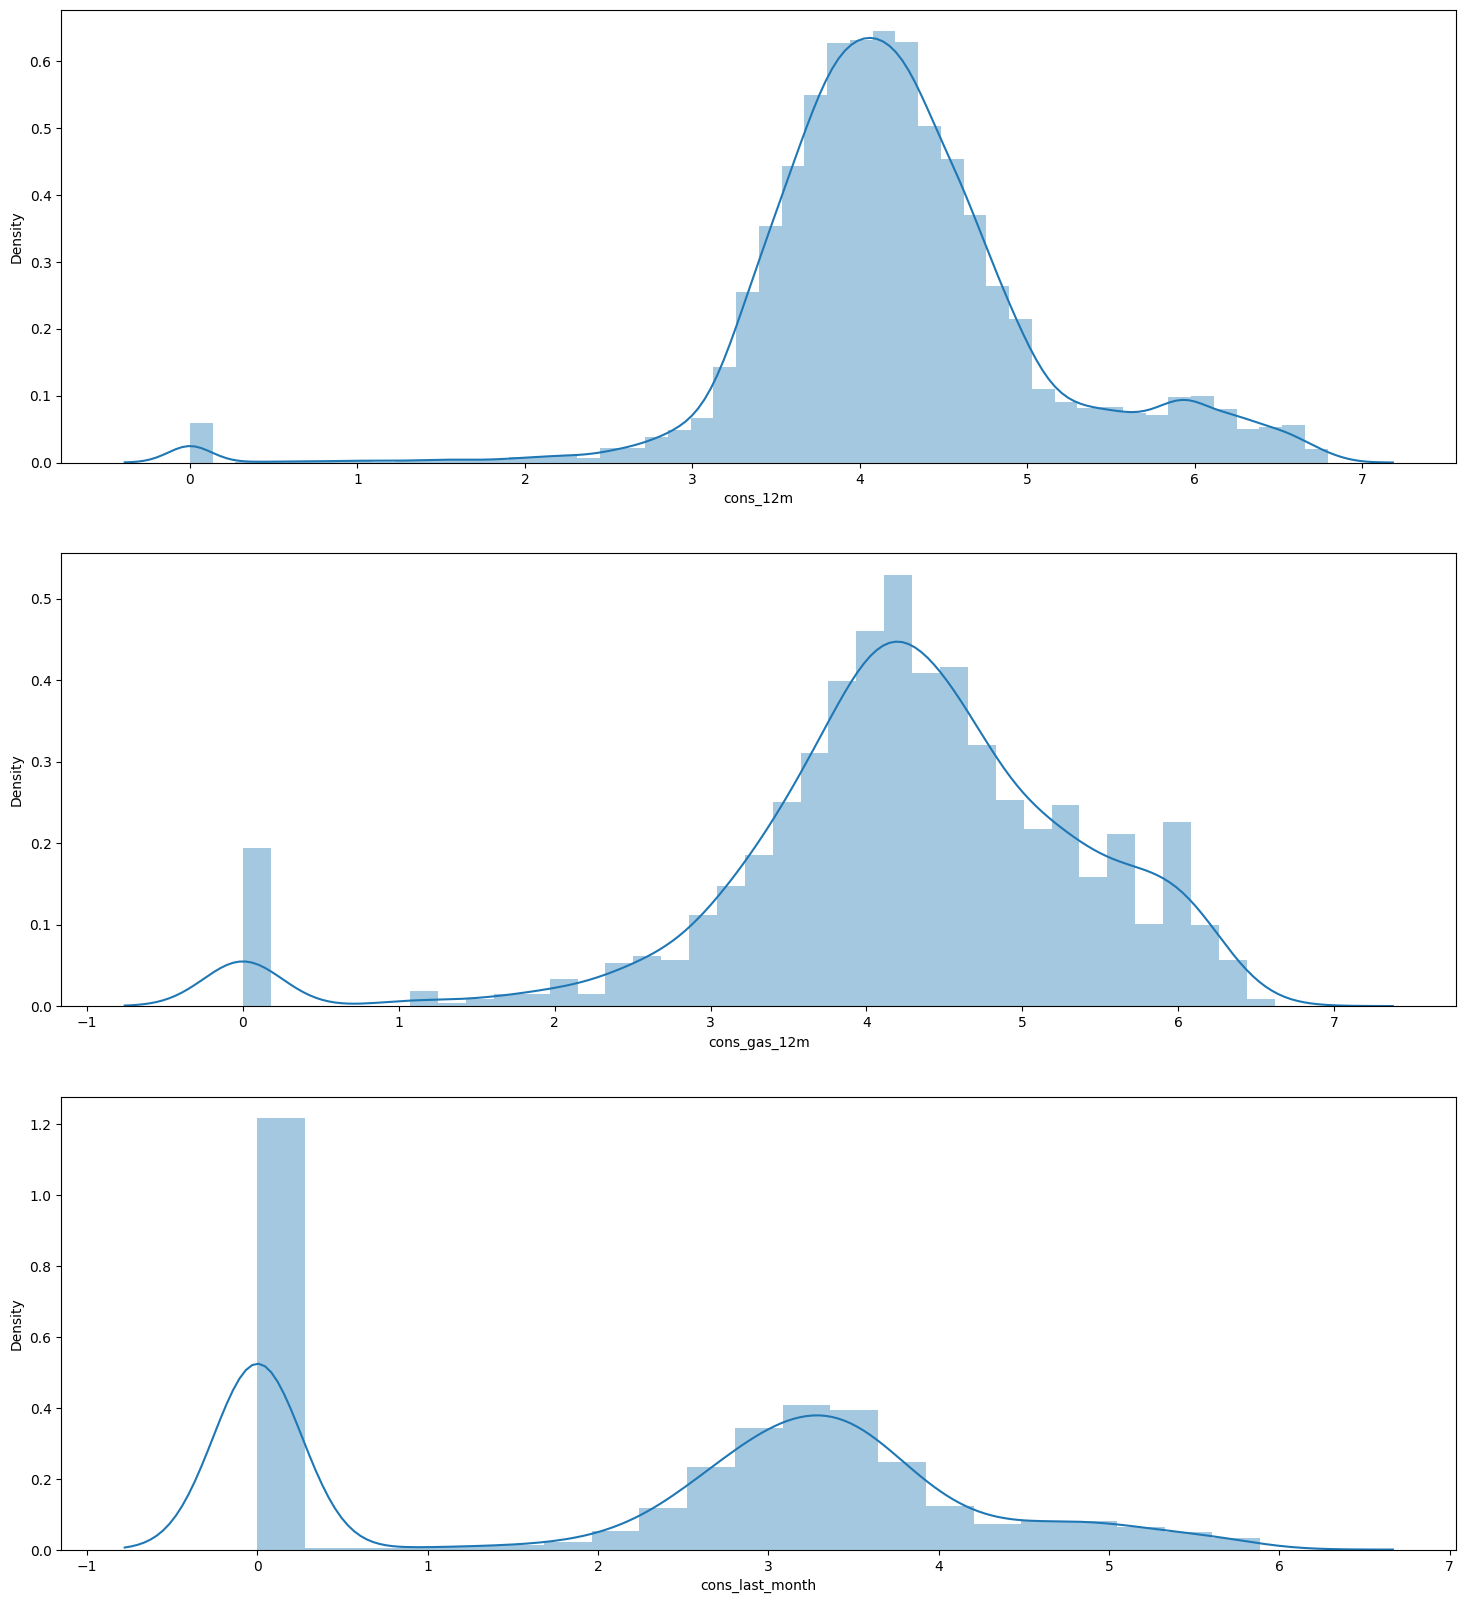

In [207]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((data["cons_12m"].dropna()), ax=axs[0])
sns.distplot((data[data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((data["cons_last_month"].dropna()), ax=axs[2])
plt.show()

#### Correlations:
In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don’t work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model.

For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

This is important because it reveals the linear relationships between features. We want features to correlate with churn, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let’s look at how all the features within the model are correlated.

In [208]:
correlation = data.corr()

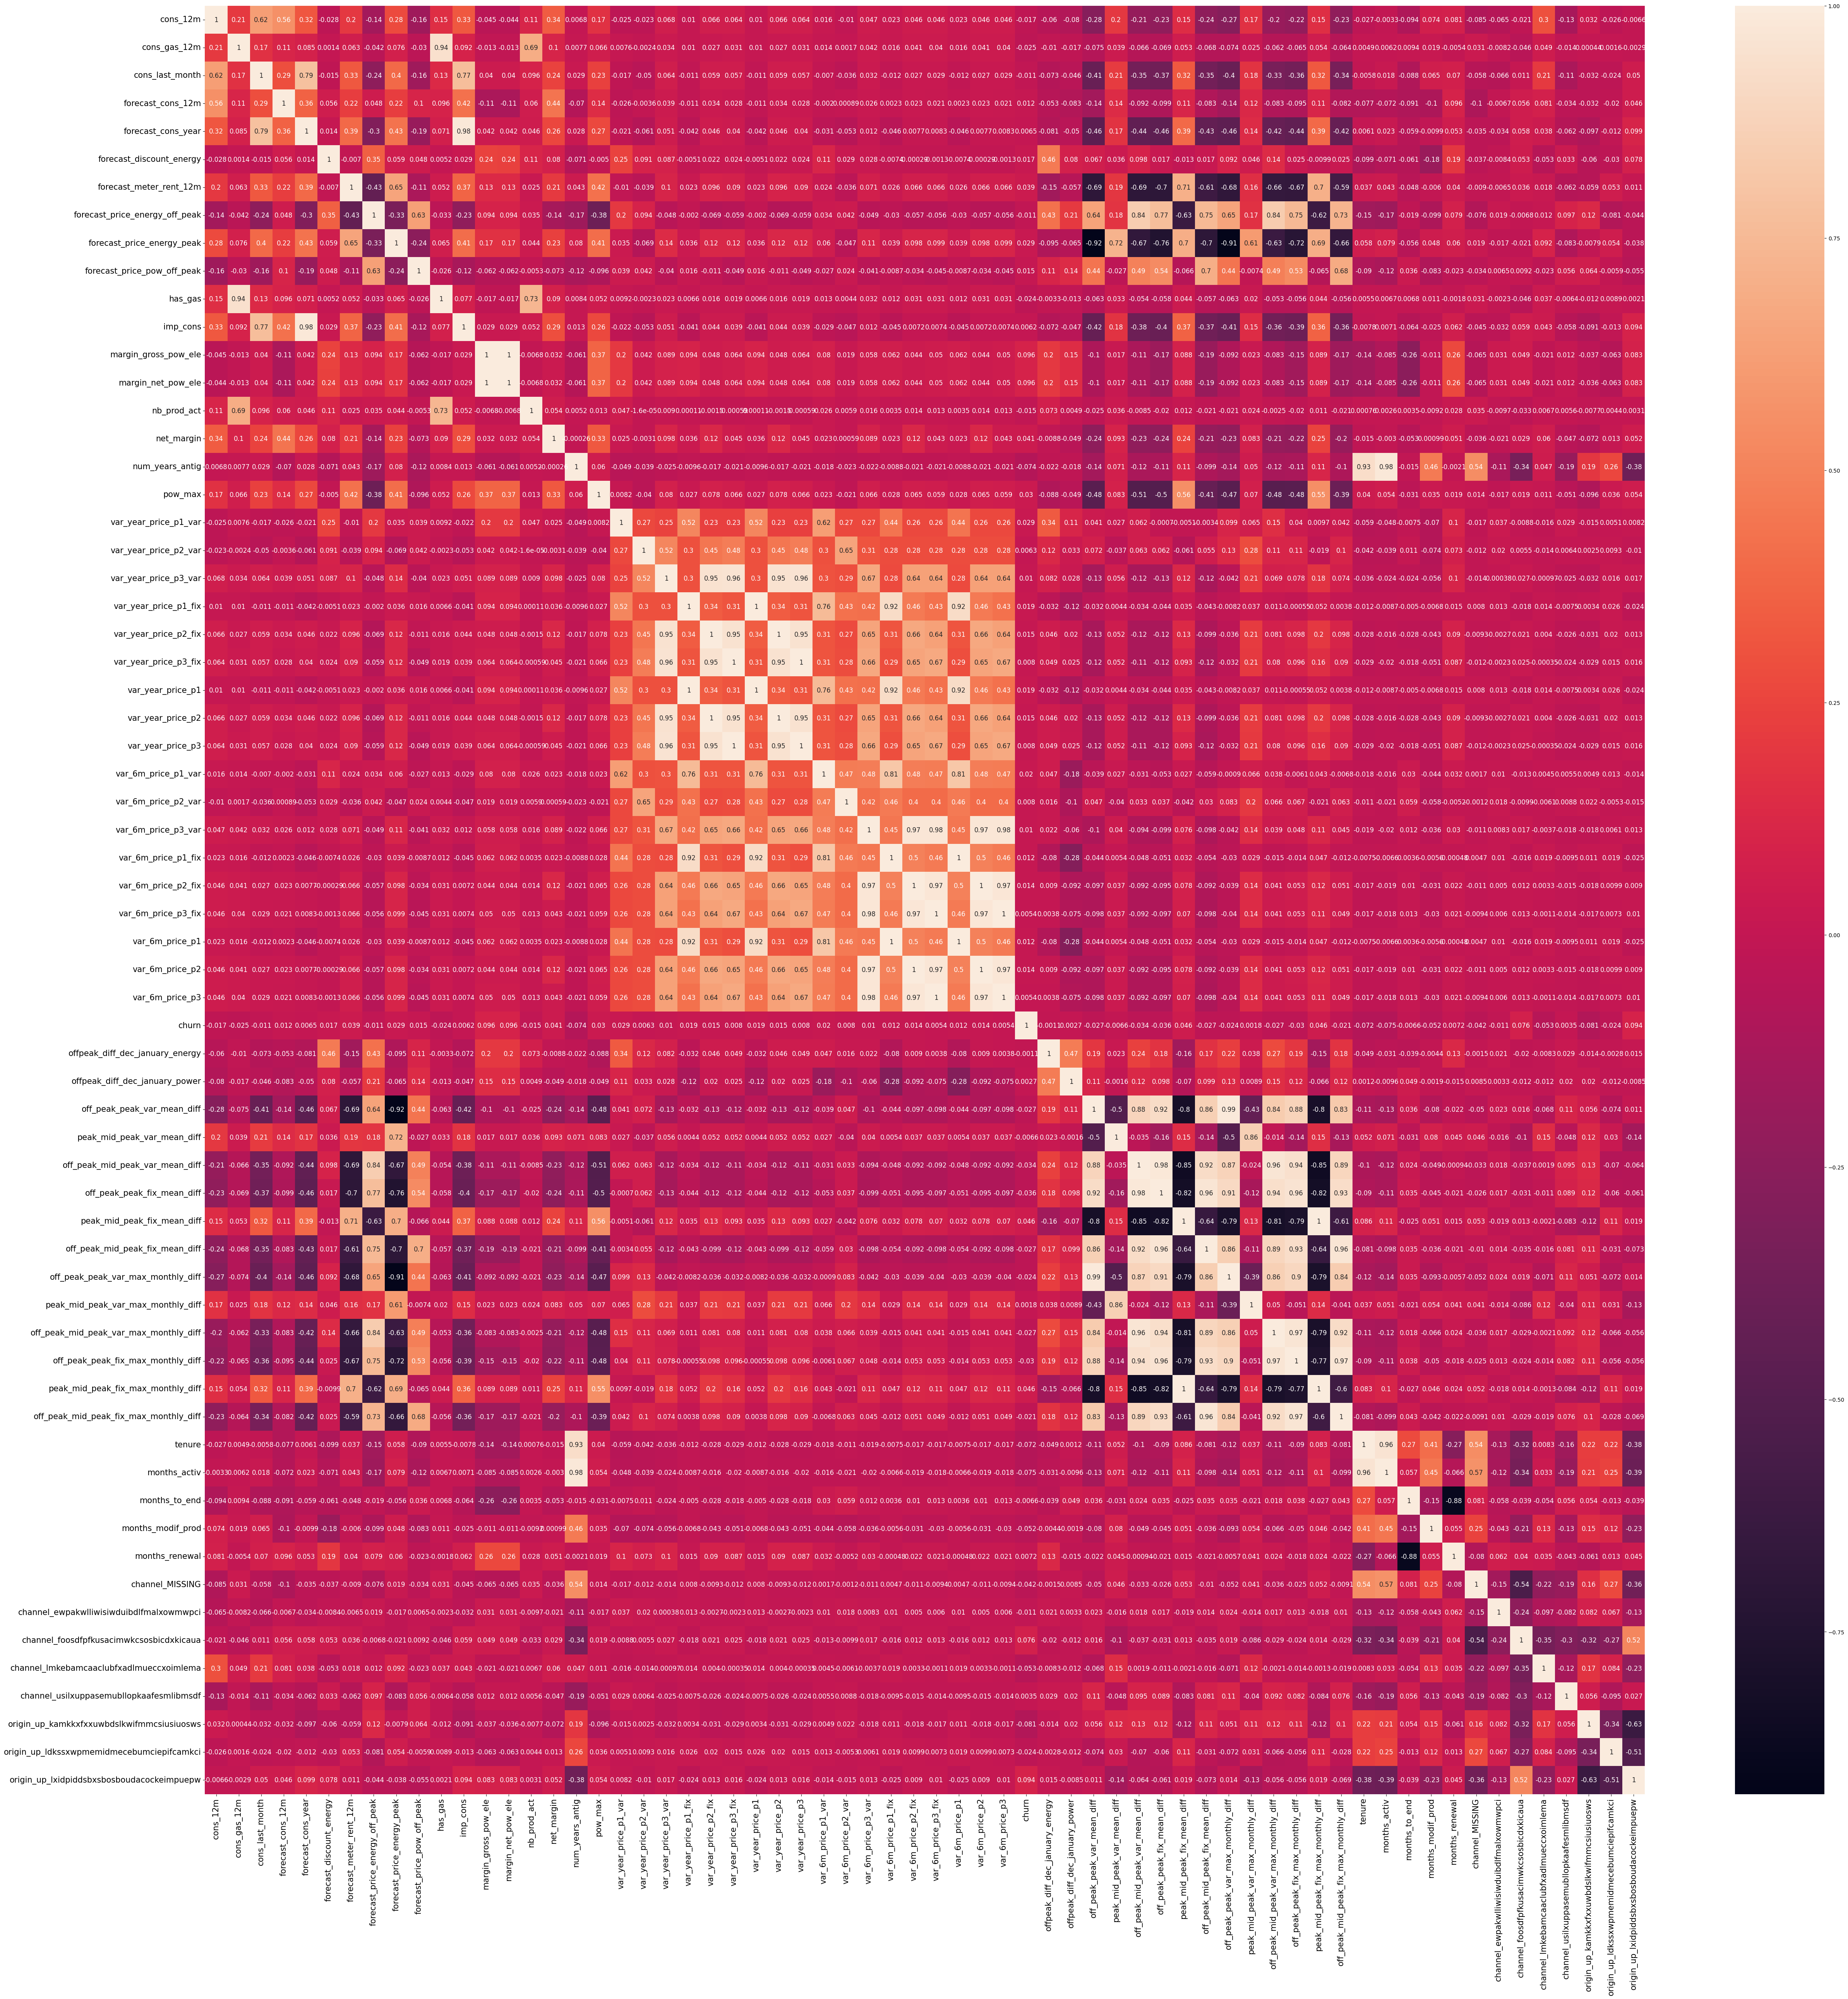

In [209]:
# Plot correlation
plt.figure(figsize=(60, 60))
sns.heatmap(correlation,
xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values,
annot=True,
annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We will drop highly correlated features.

In [210]:
data = data.drop(columns=['num_years_antig', 'forecast_cons_year'])
data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 63 columns]

#### Modelling
We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a Random Forest classifier.

In [211]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#### Data sampling
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical. A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [212]:
# Make a copy of our data
train_df = data.copy()
# Separate target variable from independent variables
y = data['churn']
X = data.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


#### Model training
Once again, we are using a Random Forest classifier in this example. A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms. As the data scientist, you can control
how large the forest is (that is, how many decision trees you want to include). 

The reason why an ensemble algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With ensemble methods, instead of banking on 1 single trained model, we can train 1000’s of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. As we increase the number of learners, the idea is that the random forest’s performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:
 - The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled.
 - It is able to handle non-linear parameters better than linear based models.

On the flip side, some disadvantages of the random forest classifier include:

 - The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
 - Training time can be longer due to the increased complexity and size of thee ensemble

In [214]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

#### Evaluation
Now let’s evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:
 - Accuracy = the ratio of correctly predicted observations to the total observations
 - Precision = the ability of the classifier to not label a negative sample as positive
 - Recall = the ability of the classifier to find all the positive samples

The reason why we are using these three metrics is because a simple accuracy is not always a good measure to use. To give an example, let’s say you’re predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you’ve done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out
on getting vital treatment to save their lives.

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.

This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario.

In [215]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [216]:
y_test.value_counts()

0    3286
1     366
Name: churn, dtype: int64

In [217]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 18
False positives: 4
True negatives: 3282
False negatives: 348

Accuracy: 0.9036144578313253
Precision: 0.8181818181818182
Recall: 0.04918032786885246


Looking at these results there are a few things to point out:
 - Within the test set about 10% of the rows are churners (churn = 1).
 - Looking at the true negatives, we have 3282 out of 3286. This means that out of all the negative cases (churn = 0), we predicted 3282 as negative (hence the name True negative). This is great!
 - Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 348, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when
improving the model.
 - Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 4 cases, which is great! 
 - With the true positives, we can see that in total we have 366 clients that churned in the test dataset. However, we are only able to correctly identify 18 of those 366, which is very poor.
 - Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.
 - Looking at the precision score, this shows us a score of 0.82 which is not bad, but could be improved.
 - However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model! 

So overall, we’re able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners
and non-churners.

A data scientist at this point would go back to feature engineering to try and create more predictive features. They may also experiment with optimising the parameters within the model to improve performance. For now, lets dive into understanding the model a little more.

#### Model understanding
A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we’re able to extract
feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [218]:
feature_importances = pd.DataFrame({
'features': X_train.columns,
'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

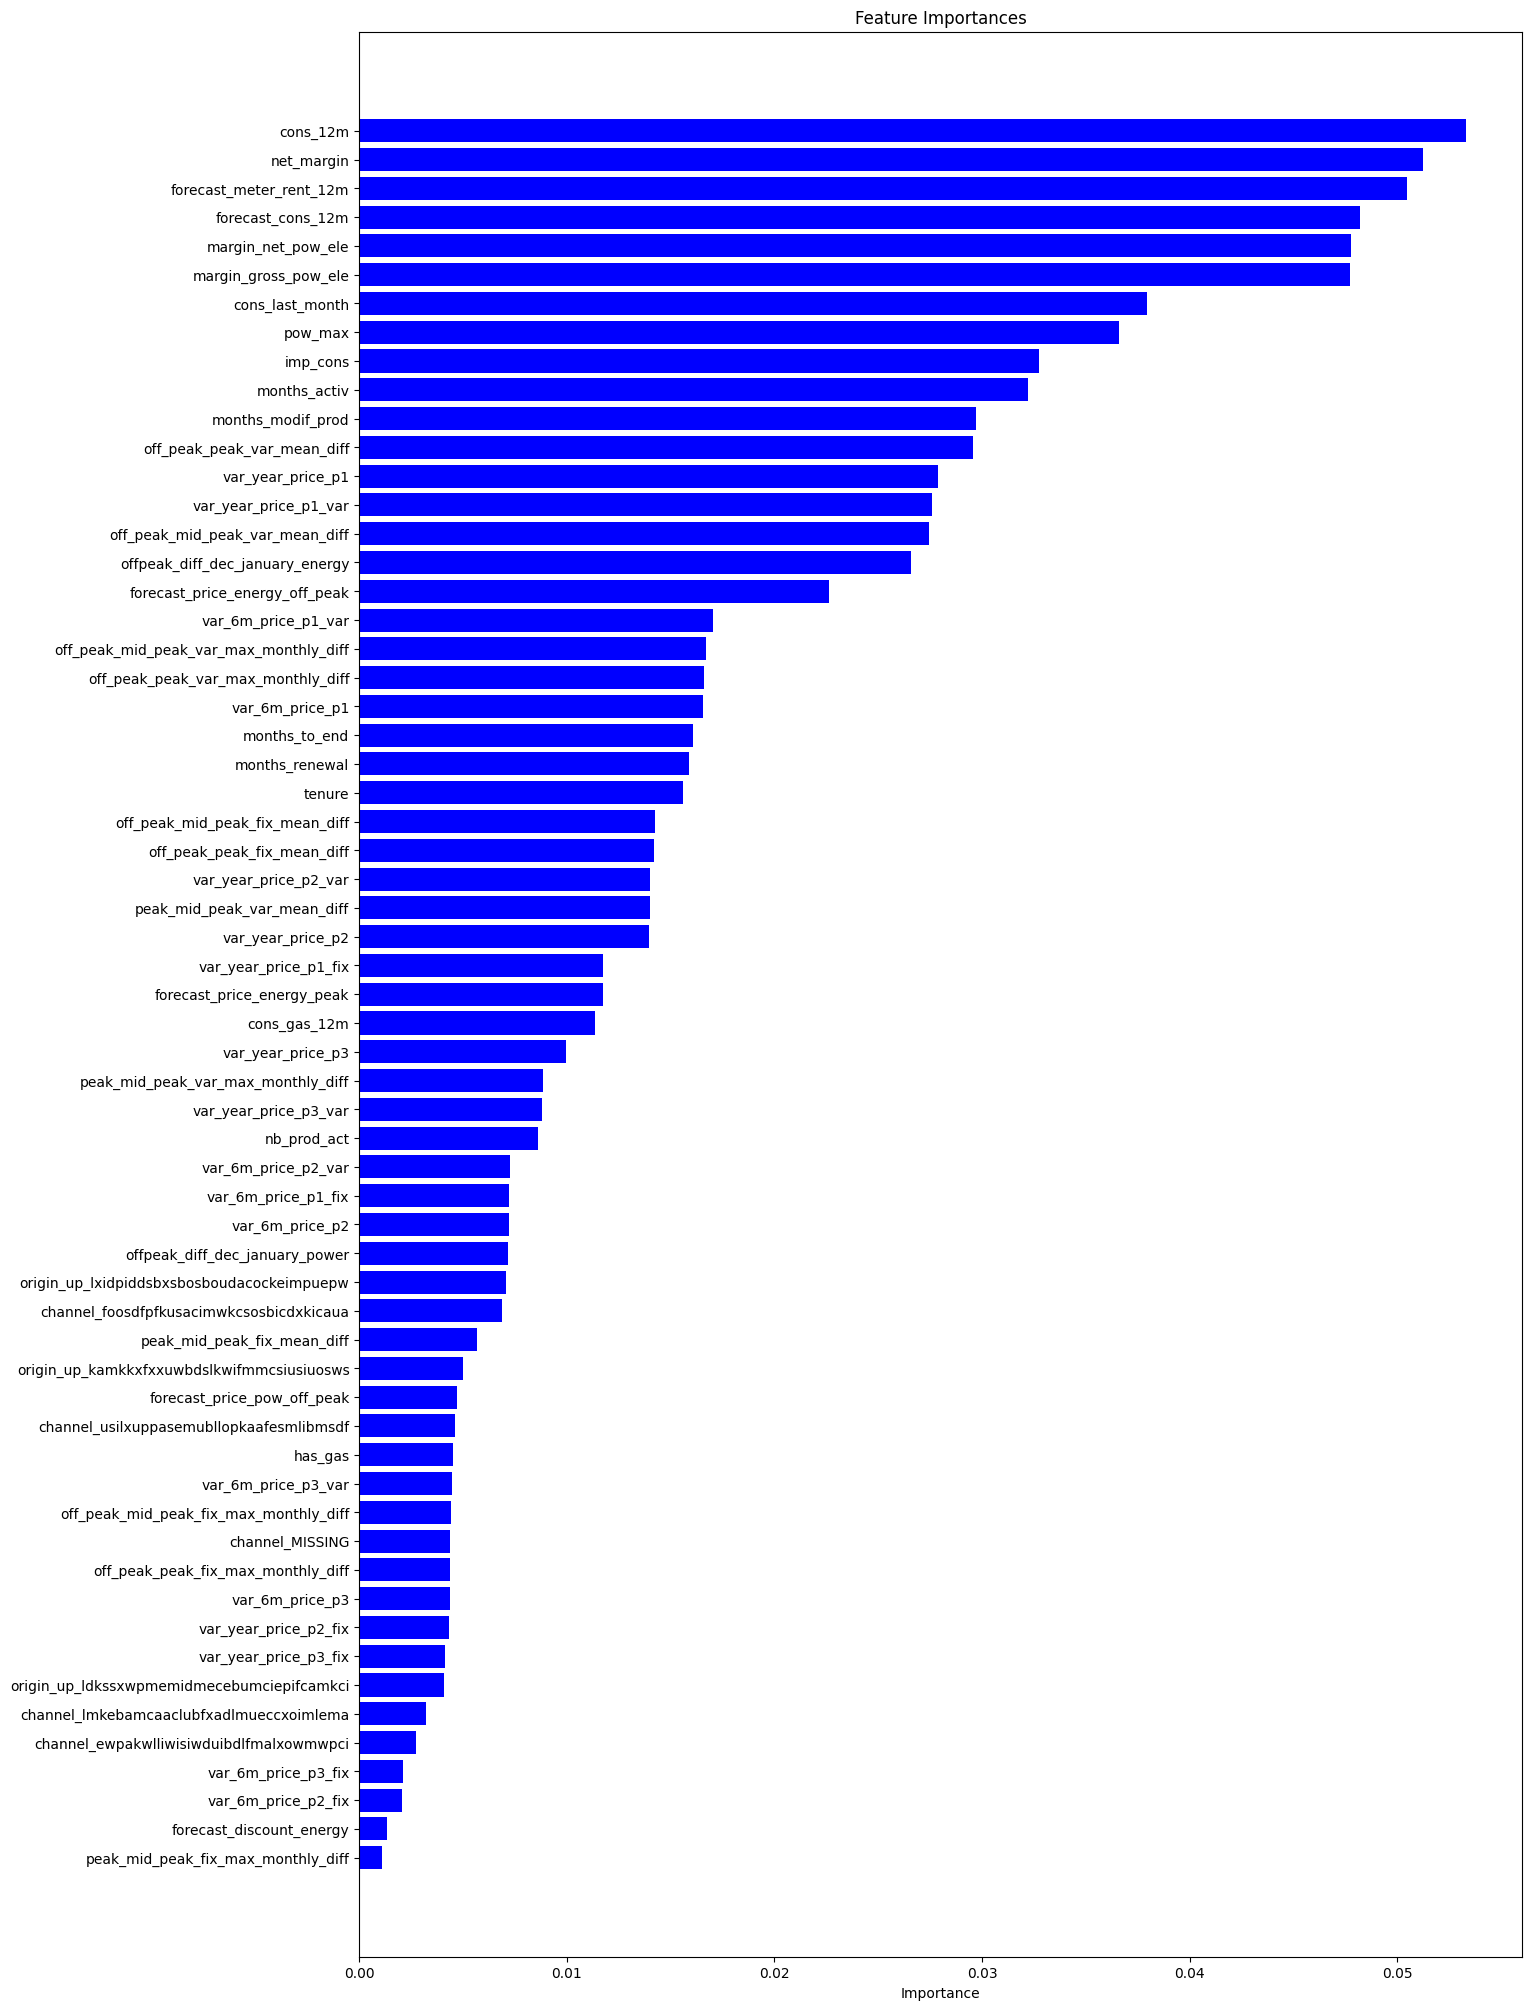

In [219]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:
 - Net margin and consumption over 12 months is a top driver for churn in this model
 - Margin on power subscription also is an influential driver
 - Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
 - The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
 - Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:
 - Is churn driven by the customers' price sensitivity?
Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [220]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [221]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [222]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

#### Business impact of discount
We conduct a brief analysis on the discount strategy proposed. This is just 1 way to solve it, there may be many other ways!

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

#### Workflow
Our task is to calculate the forecast revenue for the set of customers:
 - When no discount is offered
 - And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount
And hence to decide where the cut-off should be set in order to maximise revenue

In [223]:
test_df = pd.read_csv('out_of_sample_data_with_predictions.csv')
test_df.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0           0  4.173390      4.193598         3.165541           3.168368   
1           1  4.075036      0.000000         3.003461           3.305998   
2           2  3.848435      0.000000         0.000000           2.756568   
3           3  4.345433      0.000000         0.000000           3.516690   
4           4  4.185655      0.000000         3.355834           3.208148   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.073828   
1                      30.0                 1.255031   
2                       0.0                 1.289366   
3                       0.0                 1.304921   
4                       0.0                 2.123067   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114667                    0.099548   
1                        0.198096                    0.000000   
2                        0.141434                    0.000000   
3                        0.142996                    0.000000   
4                        0.120372                    0.103487   

   forecast_price_pow_off_peak  ...  channel_MISSING  \
0                    40.606701  ...                0   
1                    46.305378  ...                0   
2                    44.311378  ...                0   
3                    44.311378  ...                0   
4                    40.606701  ...                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probability  
0                                           1      0              0.121  
1                                           1      0              0.143  
2                                           1      0              0.028  
3                                           1      0              0.099  
4                                           0      0              0.060  

[5 rows x 64 columns]

#### Calculate a baseline revenue estimate (no intervention)
Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price and actual churn outcome. Call this basecase_revenue.
 - For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call
this new variable basecase_revenue_after_churn, ie basecase_revenue_after_churn = basecase_revenue(1 -0.919 churn)

In [224]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (np.power(10, test_df['forecast_cons_12m']) + 1) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [225]:
test_df.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0           0  4.173390      4.193598         3.165541           3.168368   
1           1  4.075036      0.000000         3.003461           3.305998   
2           2  3.848435      0.000000         0.000000           2.756568   
3           3  4.345433      0.000000         0.000000           3.516690   
4           4  4.185655      0.000000         3.355834           3.208148   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.073828   
1                      30.0                 1.255031   
2                       0.0                 1.289366   
3                       0.0                 1.304921   
4                       0.0                 2.123067   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114667                    0.099548   
1                        0.198096                    0.000000   
2                        0.141434                    0.000000   
3                        0.142996                    0.000000   
4                        0.120372                    0.103487   

   forecast_price_pow_off_peak  ...  channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                    40.606701  ...                                         1   
1                    46.305378  ...                                         1   
2                    44.311378  ...                                         1   
3                    44.311378  ...                                         1   
4                    40.606701  ...                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probability  \
0                                           1      0              0.121   
1                                           1      0              0.143   
2                                           1      0              0.028   
3                                           1      0              0.099   
4                                           0      0              0.060   

   basecase_revenue  basecase_revenue_after_churn  
0        171.157200                    171.157200  
1        402.203316                    402.203316  
2         82.176885                     82.176885  
3        471.357082                    471.357082  
4        196.633386                    196.633386  

[5 rows x 66 columns]

#### Calculate the estimated benefits and costs of intervention
Now, pick a cut-off probability (eg 0.5) so that:
 - Customers with a higher churn probability than the cut-off get a discount, and
 - Customers below the churn-probability do not get a discount.

From this, calculate the revenue of the intervention scenario assuming: - All customers who are offered a discount accept it - Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained revenue is
0.8basecase_revenue , being (1-discount_fraction)basecase_revenue - Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer’s cost goes down then their consumption might increase. We will see two counterbalancing effects at play:
 - For true positives we will see revenue retention vs the no-discount scenario
 - For false positives we will see reduced revenue from giving them a discount when they wouldn’t in fact churn.

(False negatives represent an opportunity cost but not an actual cost difference between the two
scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren’t justified and that others are better then we should modify our assumptions.

In [226]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year,independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column -->
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

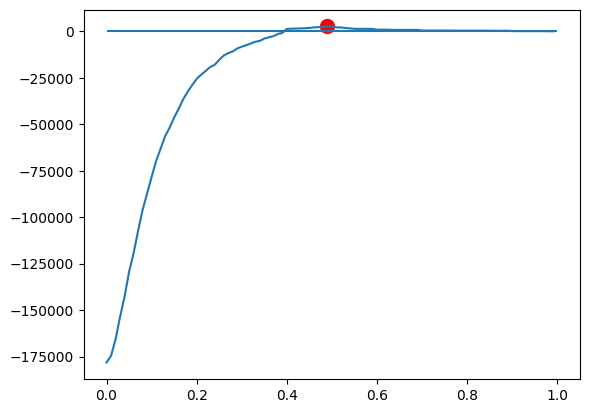

Maximum benefit at cutoff 0.49 with revenue delta of $2,629.47


In [227]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')
plot_tradeoff(rev_deltas)

#### Optional extra: how to select the cut-off?
Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?
 - For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.
 - Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [228]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount:float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

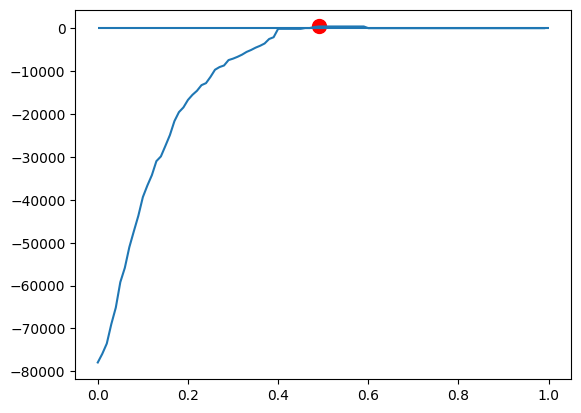

Maximum benefit at cutoff 0.49 with revenue delta of $396.02


In [229]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

#### Note:
 - In this case, it doesn’t make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn’t depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn.
 - There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs,even if the delta in the figure above is reduced.

#### Optional extra: Using forecast rather than actual churn
We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as “backtesting”, ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (churn) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

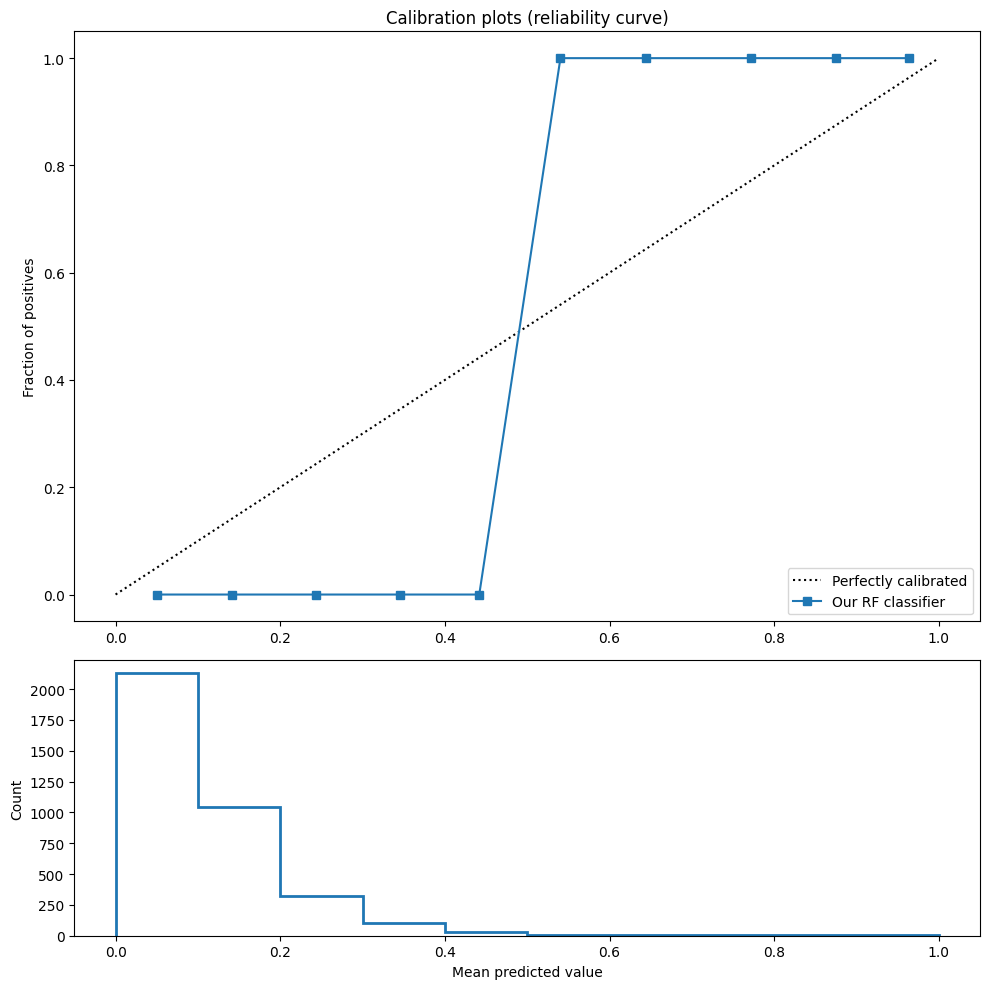

In [230]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
y_true=test_df['churn'],
y_prob=test_df['churn_probability'],
n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_df['churn_probability'], range=(0, 1), bins=10, histtype="step",lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

#### This chart tells us a few things:
 - The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier.
 - The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In practice, some work would need to be done to calibrate the probabilities, but for demonstration purposees we will skip this.

In [231]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = np.power(10, test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] 
+ test_df['forecast_meter_rent_12m']
# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn_probability'])

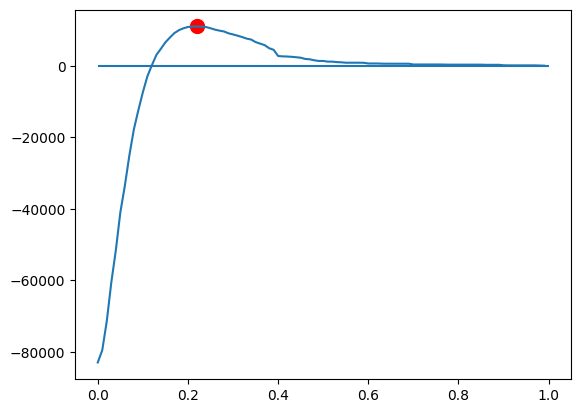

Maximum benefit at cutoff 0.22 with revenue delta of $10,984.36


In [232]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

#### Next steps: How to select the discount?
In the strategy suggested by the SME division head we offer a 20% discount to all customer targeted. However, this might not be optimal either. We assumed before that customers offered a discount will not churn. However, that may not be true in reality. The discount may not be large enough to prevent churn.

In fact, we can predict the churn probability for each customer as a function of price, margin and other factors. Therefore, we can try to find a strategy for each customer that optimises either their expected revenue or profit.

In order to go further, we’ll need to try to: - Change the level of discount offered overall - Predict the response of customers to that discount (ie, the churn probability) based on how much that discount affects their prices, the revenue and margin. - Take care that we’ve applied the discount to all affected variables. To make this easier, we might want to retrain our model using a simpler set of variables where we know that we can factor the discount correctly into the predictors. - Find the discount level that balances customer retention vs the cost of false positives.

In fact, this could be turned into a 2D optimisation problem:
 - Objective: maximise net revenue (ie including the benefits of true positives and the cost of false positives)
 - Decision variables:
     - Level of discount offered, and
     - Fraction of people who are offered a discount

An even more sophisticated strategy is to find the right level of discount for each customer that maximises their predicted revenue or margin.